# Titanic Dataset Project

# 1.Introduction to Titanic

From: https://en.wikipedia.org/wiki/RMS_Titanic
        
        RMS Titanic (/taɪˈtænɪk/) was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.[2]


## 1.1: A few questions about Titanic Data:

Below are the few of questions that have emerged from the introduction paragraph:

    1. What are the overall survival rate of the passengers? The Wikipedia paragraph painted a bleak outlook. But is there more it than meets the eye? 
    2. Is there a difference in survival rate between genders (regardless the Passenger Types)?
    3. Does the first class Passengers have higher survival rate?
    4. And that leads to another question: Is there a difference in mean ticket price between Survivors and non-Survivors?


## 1.2: The Dataset

The Dataset that was used in this report was downloaded from Udacity page- the Project: Investigate a Dataset section. This dataset contains six columns (variables). Below are the explanations on the data available in this set. 

From: https://www.kaggle.com/c/titanic/data

Data Dictionary

    Variable	Definition	     Key
    survival	Survival	     (0 = No, 1 = Yes)
    pclass	    Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
    sex	       Sex	
    Age	       Age in years	
    sibsp	    # of siblings / spouses aboard the Titanic	
    parch	    # of parents / children aboard the Titanic	
    ticket	    Ticket number	
    fare	    Passenger fare	
    cabin	    Cabin number	
    embarked	Port of Embarkation	 (C = Cherbourg, Q = Queenstown, S = Southampton)

Before we can start the analysis, it is important to make sure that the data we have is as 'cleaned' as possible. The next step is to initiate a data wrangling process. We will further investigate the type of data we have and fill up the missing values (if found).  

# 2. Data Wrangling Section

## 2.1: Importing the file into Jupyter

In [1]:
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
#Reading the file

titanic_data_df=pd.read_csv('titanic-data.csv')

In [3]:
#Viewing the first few rows from the Titanic-data file

titanic_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Finding the numbers of rows

len(titanic_data_df)

891

There are 891 rows in this datasets. Assuming each row represents one passenger, we are looking at 891 passengers in this dataset. This dataset does not contain the complete passengers list, as mentioned in the Introduction section from the Wikipedia. 

## 2.2: Cleaning the Data

Cleaning the data involved two process:-

1. Check for duplicates in Ticket Number.
2. Fill up 'NaN' value with 'NA' (Not Available). 

### 2.2.1.1: Check for duplicates in Ticket Number

This works on an assumption that Ticket number is unique for each passenger.

In [5]:
"""Checking for Duplicates tickets. The below code will output a few samples"""

titanic_data_df.duplicated('Ticket')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875    False
876     True
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885     True
886    False
887    False
888     True
889    False
890    False
dtype: bool

The above results shows that a few customers may shared the same ticket numbers. The code below will check two samples 
that shows two passengers with the shared tickets. We will then take a couple of these passengers that shared the same ticket number in order to confirm our assumptions that ticket numbers are unique.

In [6]:
(titanic_data_df.duplicated('Ticket')==True).sum()

210

There are around 210 data with the same ticket number. We will do a random sample checkup in order to find out why is this the case.

In [7]:
#procedure to return the data in a particular row

def return_row_data(row):
    return titanic_data_df.iloc[row]

In [8]:
#Extract the details from row 879 since that row returns a True result, aka duplicate was found.

print 'Data from row 879'
return_row_data(879)

Data from row 879


PassengerId                                              880
Survived                                                   1
Pclass                                                     1
Name           Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
Sex                                                   female
Age                                                       56
SibSp                                                      0
Parch                                                      1
Ticket                                                 11767
Fare                                                 83.1583
Cabin                                                    C50
Embarked                                                   C
Name: 879, dtype: object

We found out Mrs Potter is holding the ticket numbers 11767. Next step is to filter all passengers that hold the same ticket number. 

In [9]:
#Function to return the list of passengers based on the Ticket number

def check_ticket(ticket):
    return titanic_data_df.loc[titanic_data_df['Ticket'] == ticket]          

In [10]:
#Investigate other passengers that shared the same Ticket number as Mrs Potter, Ticket number 11767

check_ticket('11767')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


Two passengers were sharing the same ticket number. They don't seem to be related, nor they shared the same Cabin number. 
Further investigation is needed on other duplicated data in order to make sure this is a standard practise by RMS Titanic. 

In [11]:
#Checking for the second set of duplicate data.Based on the result, we will take passenger in row 24

return_row_data(24)

PassengerId                               25
Survived                                   0
Pclass                                     3
Name           Palsson, Miss. Torborg Danira
Sex                                   female
Age                                        8
SibSp                                      3
Parch                                      1
Ticket                                349909
Fare                                  21.075
Cabin                                    NaN
Embarked                                   S
Name: 24, dtype: object

Row 24 returns a passenger with ticket number 349909, and it belongs to a certain Miss Palsson. 

In [12]:
#Investigate other passengers that shared the same Ticket number as Miss Palsson. Ticket number 349909. 

check_ticket('349909')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


Ticket number 349909 were shared by four passengers. Based on their names, we can conclude they came from the same family. 

In [13]:
#Checking for another set of duplicated ticket number, this time from row 863

return_row_data(863)

PassengerId                                  864
Survived                                       0
Pclass                                         3
Name           Sage, Miss. Dorothy Edith "Dolly"
Sex                                       female
Age                                          NaN
SibSp                                          8
Parch                                          2
Ticket                                  CA. 2343
Fare                                       69.55
Cabin                                        NaN
Embarked                                       S
Name: 863, dtype: object

In [14]:
#Investigate other passengers that shared the same Ticket number as Miss Sage. Ticket number 2343.

check_ticket('CA. 2343')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


The result returns another set of family.

### Conclusion on Duplicate Ticket Number:

Data from two out of three tickets shows a family relations. A quick search on Hays, Miss. Margaret Bechstein revealed that she has been traveling with Lily Potter (source: https://www.encyclopedia-titanica.org/titanic-survivor/margaret-bechstein-hays.html). So an assumption can be made that the Titanic Ticket number is not a unique identifier. A family or a group of friends can shared the same ticket number.

Next step in the analysis is to check by the Passenger ID. Apart from Ticket Number,  we can also assume each Passenger should have a unique Passenger ID. The below code will check for duplication in Passenger ID

### 2.2.1.2: Check for Duplicate in Passenger ID

In [15]:
""""
Check the duplicate entry for Passenger ID. 
Assumptions: All Passenger gets their own unique Passenger ID
"""

titanic_data_df.duplicated('PassengerId').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

All of the samples above return 'False'. We will be doing further check to re-confirm that they are no duplicated Passenger ID in the list

In [16]:
#Counting the boolean results from the duplicated series

duplicate_result=titanic_data_df.duplicated('PassengerId')
duplicate_result.value_counts()

False    891
dtype: int64

The code above did not return any True value. So we can safely assume that they are no duplicates in Passenger ID column

### Conclusion on Duplicate Passenger ID. 

We can conclude that Passenger ID is unique identifier for each passenger. And we can also confirm there are 891 passengers in this dataset. 

### 2.2.2: Fill up the 'NaN' value with NA

'NaN' stands for Not a Number, which was filled when we have an undefined or 'empty' value. Some of the data from this dataset is missing, and we will be filling up the NaN value with NA (Not Available). This is important to make sure these 'empty' or missing value will not cause problem should we need further analysis.

In [17]:
# Function to check for NaN value in the dataset

def check_null():
    print titanic_data_df.isnull().sum()

In [18]:
check_null()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The 'Cabin' column in this dataset has a lot of missing value. This might cause a problem if we want to determine if Cabin position is instrumental in your chances of surviving the Titanic. However, we will not be delving deeper into that question in this report. We will then proceed with replacing the 'NaN' value with 'NA' (Not Available)

In [19]:
#The below code will replace all the 'NaN' value with NA (Not Available)

titanic_data_df.fillna(value='NA').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S


As we can see in the above sample, the 'Cabin' column for the 1st, 3rd and 5th passengers have been replaced with NA.

# 3. Exploring the Data

In this section, we will be looking at:-
    
    1. Overall Survival Rate
    2. Survival rate between Female and Male
    3. Survival rate between all classes of passengers (Class 1, 2 and 3)
    4. The above question #3 leads to another question: Is there a difference in mean ticket price between Survivors and non-Survivors?
    

## 3.1: Overall Survival Rate

In [20]:
#function to print the total number of Titanic passengers. 

def titanic_total():
    print 'Total number of passengers:', len(titanic_data_df)

In [21]:
#A function to count the passengers based on the column name and value given

def count_passenger(column_name, data_value):
    return len(titanic_data_df.loc[titanic_data_df[column_name] == data_value ]) 

In [22]:
#A function that take total passengers and breakdown variables and return the percentage value at two decimal points

def count_percent(total_passengers, breakdown):
    return round((float(breakdown) / float(total_passengers) * 100),2) 

In [23]:
#A function that print out the count and the percentage of the passengers

def passenger_report(col_name, col_value):
    print 'The number of Passengers:',  count_passenger(col_name, col_value)
    percent =count_percent(len(titanic_data_df), count_passenger(col_name, col_value) )
    print 'Percentage(%) of the Passengers:', percent


In [24]:
##The value is Survived=1 (for survivors) or Survived=0 (for non-survivors)

titanic_total()
print ''
print 'Survival Report'
passenger_report('Survived', 1)
print '' #line break
print 'Non-Survival Report'
passenger_report('Survived', 0)


Total number of passengers: 891

Survival Report
The number of Passengers: 342
Percentage(%) of the Passengers: 38.38

Non-Survival Report
The number of Passengers: 549
Percentage(%) of the Passengers: 61.62


It's unfortunate that the majority of the passengers did not survive the voyage to America. Around 61% of the passengers perished on the voyage.

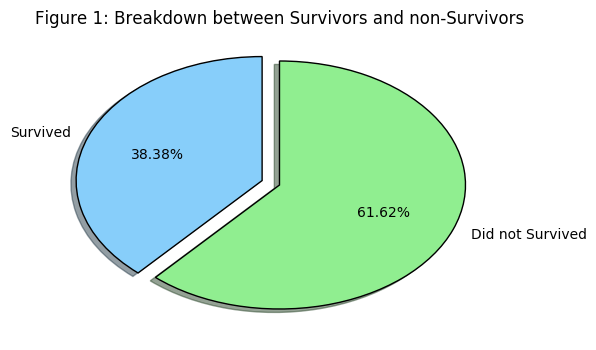

In [25]:
#Pie Chart that shows the breakdown between Survivors and non-Survivors 

percent_survived=count_percent(len(titanic_data_df), count_passenger('Survived', 1) )
percent_not_survived=count_percent(len(titanic_data_df), count_passenger('Survived', 0) )

labels = ['Survived', 'Did not Survived']
sizes = [percent_survived, percent_not_survived]
explode = (0.1, 0)
cols = ['lightskyblue','lightgreen']

plt.pie(sizes, explode, labels, autopct='%1.2f%%', startangle=90, colors=cols, shadow=True,)
plt.title('Figure 1: Breakdown between Survivors and non-Survivors')
plt.show()

## 3.2: Survival Rate between Females and Males

### 3.2.1: Counting the numbers of Female and Male passengers

In [26]:
titanic_total()
print ''
print 'Number of female passengers'
passenger_report('Sex','female')
print '' #line break
print 'Number of male passengers'
passenger_report('Sex','male')

Total number of passengers: 891

Number of female passengers
The number of Passengers: 314
Percentage(%) of the Passengers: 35.24

Number of male passengers
The number of Passengers: 577
Percentage(%) of the Passengers: 64.76


From the above findings, almost 65% of the passengers are male passengers and they made up the majority of the Titanic passengers. We will now break it down to their survival rates

### 3.2.2: Finding the survival rate based on Genders

In [27]:
#return a count based on Survived value

def count_survival(groupby_name):
    return titanic_data_df[titanic_data_df['Survived'] == 1].groupby(groupby_name).count()

In [28]:
#return a count based on non-survival value

def count_non_survival(grouby_name):
    return titanic_data_df[titanic_data_df['Survived'] == 0].groupby(grouby_name).count()

In [29]:
#The full list between Survivors and non-Survivors breakdown by Genders

print 'Survivors Count'
female_survivors = count_survival('Sex').Survived['female']
print 'Female Survivors Count:',female_survivors
male_survivors = count_survival('Sex').Survived['male']
print 'Male Survivors Count:', male_survivors 
print '' #line break
print 'Non-Survivors Count'
female_non_survivors=count_non_survival('Sex').Survived['female']
print 'Female non-Survivors Count:', female_non_survivors
male_non_survivors=count_non_survival('Sex').Survived['male']
print 'Male non-Survivors Count:', male_non_survivors

Survivors Count
Female Survivors Count: 233
Male Survivors Count: 109

Non-Survivors Count
Female non-Survivors Count: 81
Male non-Survivors Count: 468


From the result above, 233 female survived the tragedy while only 109 male survived, even though male passengers made up the majority.

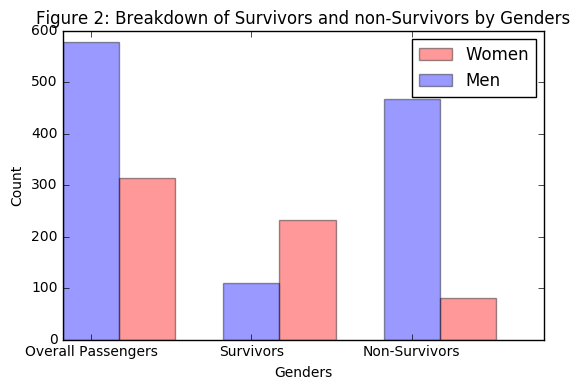

In [30]:
#Graph bar that shows the breakdown between survivors and non-survivors based on gender

count_female=count_passenger('Sex', 'female')
count_male=count_passenger('Sex', 'male')
first_bar= (count_female, female_survivors, female_non_survivors)
second_bar= (count_male, male_survivors, male_non_survivors)


fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index + bar_width, first_bar, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Women')

rects2 = plt.bar(index, second_bar, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Men')


plt.xlabel('Genders')
plt.ylabel('Count')
plt.title('Figure 2: Breakdown of Survivors and non-Survivors by Genders')
plt.xticks(index + bar_width / 2, ('Overall Passengers', 'Survivors', 'Non-Survivors'))
plt.legend()

plt.tight_layout()
plt.show()

Even though male made up a majority of the Titanic passengers (577 passengers), it was the females that made up the majority of the survivors (with 233 female passengers surviving the voyage).

## 3.3: Finding the Survival Rate based on Class

### 3.3.1: Finding the overall passengers separated by Ticket Class

In [31]:
titanic_total()
print ''
print 'Number of passengers in the 1st Class'
passenger_report ('Pclass', 1)
print '' #line break
print 'Number of passengers in the 2nd Class'
passenger_report ('Pclass', 2)
print '' #line break
print 'Number of passengers in the 3rd Class'
passenger_report ('Pclass', 3)

Total number of passengers: 891

Number of passengers in the 1st Class
The number of Passengers: 216
Percentage(%) of the Passengers: 24.24

Number of passengers in the 2nd Class
The number of Passengers: 184
Percentage(%) of the Passengers: 20.65

Number of passengers in the 3rd Class
The number of Passengers: 491
Percentage(%) of the Passengers: 55.11


The 3rd Class passengers made up the majority of the ticket holders. We will now break it down further between survivors and non-survivors in each class

### 3.3.2: Breakdown of survivors and non-survivors by Class Ticket

In [32]:
#Finding the survivors in each class

print 'Survivors in Class 1:', count_survival('Pclass').Survived[1]
print 'Survivors in Class 2:', count_survival('Pclass').Survived[2]
print 'Survivors in Class 3:', count_survival('Pclass').Survived[3]
print '' #line break
print 'Non-Survivors in Class 1:', count_non_survival('Pclass').Survived[1]
print 'Non-Survivors in Class 2:', count_non_survival('Pclass').Survived[2]
print 'Non-Survivors in Class 3:', count_non_survival ('Pclass').Survived[3]

Survivors in Class 1: 136
Survivors in Class 2: 87
Survivors in Class 3: 119

Non-Survivors in Class 1: 80
Non-Survivors in Class 2: 97
Non-Survivors in Class 3: 372


The 3rd class passengers made up the majority of non-survivors, even though they are the biggest group of passengers on the Titanic. We can further break this down by Genders, whether female has a higher survival rate through all classes.

### 3.3.3: Survivors breakdown by Class and Genders

In [33]:
#Survivors and non-Survivors breakdown by Class and Genders
    
titanic_data_df.groupby(['Survived', 'Pclass', 'Sex'])[['PassengerId']].count()

PassengerId
Survived Pclass Sex                
0        1      female            3
                male             77
         2      female            6
                male             91
         3      female           72
                male            300
1        1      female           91
                male             45
         2      female           70
                male             17
         3      female           72
                male             47

As we can see from the above, the biggest casualty is male passengers in the 3rd Class. While females in the 1st Class made up the biggest group of survivors. Overall, females made up the majority of Survivors in each Class

## 3.4: Mean Ticket Price for Survivors and non-Survivors

Based on the findings above, do survivors actually paid more for their ticket price?

In [34]:
#finding the mean ticket price difference between Survivors and non-Survivors

print 'Mean of the ticket Price Difference in Pound Sterling (£):'
titanic_data_df.groupby(['Survived'])[['Fare']].mean()

Mean of the ticket Price Difference in Pound Sterling (£):


,Fare
Survived,
0,22.117887
1,48.395408


The mean ticket price for survivors is around £48 while the non-survivors paid a lower mean ticket price at £22. This result brought up another curiosity: What is the highest price paid by Survivors and non-Survivors?

In [35]:
#Check for highest value in Fare column

print 'Highest Ticket Fare by both groups'
titanic_data_df.groupby(['Survived'])[['Fare']].max()

Highest Ticket Fare by both groups


,Fare
Survived,
0,263.0000
1,512.3292


The highest price paid by non-Survivor is actually higher than the mean ticket price for Survivors's. It is possible the victim paid for a seat in the 1st Class.

# 4. Conclusion:

Based on the analysis, gender and ticket class do play some contributing factors into survival rate of the Titanic passengers. You have a higher chance of surviving if you're a female from the 1st Class. However, this is a tentative findings since further statistical analysis is needed to confirm if these results are statistically significant. 

The conclusion from this report is also based on incomplete data, since we're only analysing 891 passengers while report from Wikipedia estimated 2224 passengers and crews were on the ship. Further analysis can be done if we have other information such as time taken to get into the lifeboat (does shorter duration between alarm sounds and getting into your lifeboat ensure a higher chance of survival?). Which brings us to Cabin numbers and their positions on the ship. Unfortunately, most of the Cabin numbers were missing from this dataset

# About this documentation:

    All codes were written on Python 2.7
    Conda-env: DAND
    Jupyter Notebook viewable on Mozilla Firefox ver 52.2.1 (32bit)